In [ ]:
1+1

# Merge the "tn.movie_budgets" and "tmdb.movies" data sets


In [ ]:
import pandas as pd

In [27]:
df11 = pd.read_csv("tn.movie_budgets.csv")
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [92]:
df11['date']=pd.to_datetime(df11['release_date'])
df11['date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
5      2015-12-18
6      2018-04-27
7      2007-05-24
8      2017-11-17
9      2015-11-06
10     2012-07-20
11     2018-05-25
12     2013-07-02
13     2012-03-09
14     2010-11-24
15     2007-05-04
16     2016-05-06
17     2016-03-25
18     2012-12-14
19     2009-07-15
20     2013-12-13
21     2014-12-17
22     2017-04-14
23     2006-06-28
24     2017-05-26
25     2008-11-14
26     2012-05-04
27     2006-07-07
28     2013-06-14
29     2008-05-16
          ...    
5752   1991-08-01
5753   2014-12-31
5754   2003-12-31
5755   2013-01-04
5756   2015-04-21
5757   2003-12-01
5758   2011-11-25
5759   2006-06-02
5760   2010-04-02
5761   2014-12-31
5762   1997-04-11
5763   2006-04-28
5764   2007-12-31
5765   2001-03-09
5766   2006-04-28
5767   2001-07-06
5768   2004-05-28
5769   1996-04-01
5770   2008-08-14
5771   2015-05-19
5772   2012-01-13
5773   1993-02-26
5774   2004-10-08
5775   2006-05-26
5776   200

In [93]:
df11['year'] = df11['date'].dt.year
df11['year'].head()

0    2009
1    2011
2    2019
3    2015
4    2017
Name: year, dtype: int64

In [97]:
df11_10 = df11.loc[df11['year'] > 2009, :]

In [183]:
df11_1018 = df11_10.loc[df11_10['year']<2019,:]
df11_1018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 5780
Data columns (total 8 columns):
id                   2124 non-null int64
release_date         2124 non-null object
movie                2124 non-null object
production_budget    2124 non-null object
domestic_gross       2124 non-null object
worldwide_gross      2124 non-null object
date                 2124 non-null datetime64[ns]
year                 2124 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 149.3+ KB


In [184]:
test = df11_1018.drop_duplicates(subset='movie', keep='first')
test.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,2011
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018-04-27,2018


In [185]:
test['production_budget']=test['production_budget'].replace('[\$,]', '', regex=True).astype(float)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 1 to 5780
Data columns (total 8 columns):
id                   2120 non-null int64
release_date         2120 non-null object
movie                2120 non-null object
production_budget    2120 non-null float64
domestic_gross       2120 non-null object
worldwide_gross      2120 non-null object
date                 2120 non-null datetime64[ns]
year                 2120 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 149.1+ KB


In [100]:
df10 = pd.read_csv("tmdb.movies.csv")
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [101]:
df10['date']=pd.to_datetime(df10['release_date'])
df10['date'].head()

0   2010-11-19
1   2010-03-26
2   2010-05-07
3   1995-11-22
4   2010-07-16
Name: date, dtype: datetime64[ns]

In [102]:
df10['year'] = df10['date'].dt.year
df10['year'].head()

0    2010
1    2010
2    2010
3    1995
4    2010
Name: year, dtype: int64

In [104]:
df10_10 = df10.loc[df10['year'] > 2009, :]
df10_1018 = df10_10.loc[df10_10['year']<2019,:]
df10_1018.info()
df10_1018.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26227 entries, 0 to 26516
Data columns (total 12 columns):
Unnamed: 0           26227 non-null int64
genre_ids            26227 non-null object
id                   26227 non-null int64
original_language    26227 non-null object
original_title       26227 non-null object
popularity           26227 non-null float64
release_date         26227 non-null object
title                26227 non-null object
vote_average         26227 non-null float64
vote_count           26227 non-null int64
date                 26227 non-null datetime64[ns]
year                 26227 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 2.6+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,date,year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010-11-19,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010-03-26,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010-05-07,2010
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010-07-16,2010
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010-02-11,2010
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010-06-17,2010
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,2010-07-09,2010
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,2010-11-04,2010
11,11,"[10751, 14, 12]",12155,en,Alice in Wonderland,22.020,2010-03-05,Alice in Wonderland,6.6,8713,2010-03-05,2010
12,12,"[53, 12, 28]",27578,en,The Expendables,21.517,2010-08-03,The Expendables,6.1,4647,2010-08-03,2010


In [110]:
df10_1018.year.value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
Name: year, dtype: int64

In [144]:
tnmerge = df11_1018.merge(df10_1018, left_on='movie', right_on='title',how='inner')
tnmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2009
Data columns (total 20 columns):
id_x                 2010 non-null int64
release_date_x       2010 non-null object
movie                2010 non-null object
production_budget    2010 non-null object
domestic_gross       2010 non-null object
worldwide_gross      2010 non-null object
date_x               2010 non-null datetime64[ns]
year_x               2010 non-null int64
Unnamed: 0           2010 non-null int64
genre_ids            2010 non-null object
id_y                 2010 non-null int64
original_language    2010 non-null object
original_title       2010 non-null object
popularity           2010 non-null float64
release_date_y       2010 non-null object
title                2010 non-null object
vote_average         2010 non-null float64
vote_count           2010 non-null int64
date_y               2010 non-null datetime64[ns]
year_y               2010 non-null int64
dtypes: datetime64[ns](2), float64(2), in

In [114]:
np.unique(tnmerge.movie.values).size

1689

In [108]:
tnbt = set(df11_1018['movie'].values)
len(tnbt)

2120

In [109]:
tmbdt = set(df10_1018['title'].values)
len(tmbdt)

24442

In [111]:
tndiff= tnbt - tmbdt
len(tndiff)

431

In [115]:
tndiff2 = tmbdt - tnbt
len(tndiff2)

22753

In [40]:
!pip install StringDist

  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built StringDist


In [43]:
import stringdist as sd 
#sd.levenshtein_norm('test', 'testing')

0.42857142857142855

In [117]:
def leven(tdiff, tdiff1):
    t1=[]
    t2=[]
    score=[]
    for i in tdiff:
        for j in tdiff1:
            t1.append(i)
            t2.append(j)
            score.append(sd.levenshtein_norm(i, j))     
    ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})
    return ldf

tnmap = leven(tndiff,tndiff2)

In [118]:
tnmap = tnmap[tnmap['score']<0.3]
tnmap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 80644 to 9797756
Data columns (total 3 columns):
t1       272 non-null object
t2       272 non-null object
score    272 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


In [119]:
tnmap = tnmap.sort_values(by='score')
tnmap.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/tn_levenshtein.csv')

In [123]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 12 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
date                 26517 non-null datetime64[ns]
year                 26517 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [132]:
join1 = df11.merge(tnmap, left_on='movie', right_on = 't1', how= 'inner')
join2 = join1.merge(df10, left_on=['t2','year'], right_on = ['title','year'], how='inner')
join2

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,date_x,year,t1,t2,...,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,date_y
0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,Star Wars: The Last Jedi,...,"[14, 12, 878, 28]",181808,en,Star Wars: The Last Jedi,34.293,2017-12-15,Star Wars: The Last Jedi,7.0,8534,2017-12-15
1,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,Star Wars: The Last Jedi,...,"[14, 12, 878, 28]",181808,en,Star Wars: The Last Jedi,34.293,2017-12-15,Star Wars: The Last Jedi,7.0,8534,2017-12-15
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,2015,Star Wars Ep. VII: The Force Awakens,Star Wars: The Force Awakens,...,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,Star Wars: The Force Awakens,7.4,12641,2015-12-18
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,2015,Star Wars Ep. VII: The Force Awakens,Star Wars: The Force Awakens,...,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,Star Wars: The Force Awakens,7.4,12641,2015-12-18
4,49,"May 5, 2017",Guardians of the Galaxy Vol 2,"$200,000,000","$389,813,101","$862,316,233",2017-05-05,2017,Guardians of the Galaxy Vol 2,Guardians of the Galaxy Vol. 2,...,"[28, 12, 35, 878]",283995,en,Guardians of the Galaxy Vol. 2,40.228,2017-05-05,Guardians of the Galaxy Vol. 2,7.7,12535,2017-05-05
5,58,"Dec 17, 2010",Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763",2010-12-17,2010,Tron: Legacy,TRON: Legacy,...,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387,2010-12-10
6,58,"Dec 17, 2010",Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763",2010-12-17,2010,Tron: Legacy,TRON: Legacy,...,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387,2010-12-10
7,63,"May 28, 2010",Prince of Persia: Sands of Time,"$200,000,000","$90,759,676","$336,359,676",2010-05-28,2010,Prince of Persia: Sands of Time,Prince of Persia: The Sands of Time,...,"[12, 14, 28, 10749]",9543,en,Prince of Persia: The Sands of Time,13.440,2010-05-27,Prince of Persia: The Sands of Time,6.2,4040,2010-05-27
8,92,"Jul 27, 2018",Mission: ImpossibleâFallout,"$178,000,000","$220,159,104","$787,456,552",2018-07-27,2018,Mission: ImpossibleâFallout,Mission: Impossible - Fallout,...,[28],353081,en,Mission: Impossible - Fallout,29.690,2018-07-27,Mission: Impossible - Fallout,7.3,3811,2018-07-27
9,3,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695",2018-11-21,2018,Ralph Breaks The Internet,Ralph Breaks the Internet,...,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626,2018-11-21


In [133]:
join2.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/tnmatch.csv')

Clean matched dataset manually then upload to dataframe


In [147]:
tnmatch = pd.read_csv('tnmatch_cleaned.csv')
tnmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 23 columns):
Unnamed: 0           148 non-null int64
id_x                 148 non-null int64
release_date_x       148 non-null object
movie                148 non-null object
production_budget    148 non-null object
domestic_gross       148 non-null object
worldwide_gross      148 non-null object
date_x               148 non-null object
year                 148 non-null int64
t1                   148 non-null object
t2                   148 non-null object
score                148 non-null float64
Unnamed: 0.1         148 non-null int64
genre_ids            148 non-null object
id_y                 148 non-null int64
original_language    148 non-null object
original_title       148 non-null object
popularity           148 non-null float64
release_date_y       148 non-null object
title                148 non-null object
vote_average         148 non-null float64
vote_count           148 non-null in

In [150]:
tnmatch.drop(['Unnamed: 0','Unnamed: 0.1','t1','t2', 'score'],axis=1, inplace=True)
tnmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 18 columns):
id_x                 148 non-null int64
release_date_x       148 non-null object
movie                148 non-null object
production_budget    148 non-null object
domestic_gross       148 non-null object
worldwide_gross      148 non-null object
date_x               148 non-null object
year                 148 non-null int64
genre_ids            148 non-null object
id_y                 148 non-null int64
original_language    148 non-null object
original_title       148 non-null object
popularity           148 non-null float64
release_date_y       148 non-null object
title                148 non-null object
vote_average         148 non-null float64
vote_count           148 non-null int64
date_y               148 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 20.9+ KB


In [141]:
tnmerge.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,date_x,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,date_y
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011-05-20
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,2015-05-01
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018-04-27,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018-04-27
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,2017-11-17
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,2017-11-17


In [146]:
tnmerge.drop(['year_y','Unnamed: 0'], axis=1, inplace=True)
tnmerge.rename(columns={'year_x':'year'}, inplace=True)
tnmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2009
Data columns (total 18 columns):
id_x                 2010 non-null int64
release_date_x       2010 non-null object
movie                2010 non-null object
production_budget    2010 non-null object
domestic_gross       2010 non-null object
worldwide_gross      2010 non-null object
date_x               2010 non-null datetime64[ns]
year                 2010 non-null int64
genre_ids            2010 non-null object
id_y                 2010 non-null int64
original_language    2010 non-null object
original_title       2010 non-null object
popularity           2010 non-null float64
release_date_y       2010 non-null object
title                2010 non-null object
vote_average         2010 non-null float64
vote_count           2010 non-null int64
date_y               2010 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(10)
memory usage: 298.4+ KB


In [152]:
tn_all = tnmerge.append(tnmatch)
tn_all.head(100)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,date_x,year,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,date_y
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20 00:00:00,2011,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011-05-20 00:00:00
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01 00:00:00,2015,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,2015-05-01 00:00:00
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018-04-27 00:00:00,2018,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018-04-27 00:00:00
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17 00:00:00,2017,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,2017-11-17 00:00:00
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17 00:00:00,2017,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,2017-11-17 00:00:00
5,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015-11-06 00:00:00,2015,"[28, 12, 80]",206647,en,Spectre,30.318,2015-11-06,Spectre,6.4,6719,2015-11-06 00:00:00
6,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015-11-06 00:00:00,2015,"[28, 12, 80]",206647,en,Spectre,30.318,2015-11-06,Spectre,6.4,6719,2015-11-06 00:00:00
7,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",2012-07-20 00:00:00,2012,"[28, 80, 18, 53]",49026,en,The Dark Knight Rises,26.220,2012-07-20,The Dark Knight Rises,7.7,13933,2012-07-20 00:00:00
8,12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",2018-05-25 00:00:00,2018,"[28, 12, 878]",348350,en,Solo: A Star Wars Story,29.502,2018-05-25,Solo: A Star Wars Story,6.6,3838,2018-05-25 00:00:00
9,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",2013-07-02 00:00:00,2013,"[28, 12, 37]",57201,en,The Lone Ranger,12.482,2013-07-03,The Lone Ranger,6.0,3789,2013-07-03 00:00:00


In [155]:
tn_all.drop_duplicates(subset='movie', keep='first', inplace=True)
tn_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 147
Data columns (total 18 columns):
id_x                 1826 non-null int64
release_date_x       1826 non-null object
movie                1826 non-null object
production_budget    1826 non-null object
domestic_gross       1826 non-null object
worldwide_gross      1826 non-null object
date_x               1826 non-null object
year                 1826 non-null int64
genre_ids            1826 non-null object
id_y                 1826 non-null int64
original_language    1826 non-null object
original_title       1826 non-null object
popularity           1826 non-null float64
release_date_y       1826 non-null object
title                1826 non-null object
vote_average         1826 non-null float64
vote_count           1826 non-null int64
date_y               1826 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 271.0+ KB


# Merge bom and the 6 imdb data sets

## Merge bom.movie_gross (w/title name only) w/ imdb.title.akas (w/ title name and title_id)

In [187]:
df1 = pd.read_csv("bom.movie_gross.csv")

In [7]:
#some_dataframe.set_index("name_of_index_column", inplace=True)
#df1.set_index('title', inplace=True)

In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [191]:
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')
df1.info()

In [194]:
df1.year.value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [11]:
#df1.sort_values(by= 'domestic_gross', ascending=False)

,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.60",2015
Black Panther,BV,700100000.0,646900000,2018
Avengers: Infinity War,BV,678800000.0,"1,369.50",2018
Jurassic World,Uni.,652300000.0,"1,019.40",2015
Marvel's The Avengers,BV,623400000.0,895500000,2012
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
Incredibles 2,BV,608600000.0,634200000,2018
Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
Beauty and the Beast (2017),BV,504000000.0,759500000,2017


In [234]:
df1['world_gross']=df1['domestic_gross']+df1['foreign_gross']

In [235]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2032 non-null float64
year              3387 non-null int64
world_gross       2004 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.8+ KB


In [262]:
test3 = df1.drop_duplicates(subset= 'title' , keep='first')
test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 6 columns):
title             3386 non-null object
studio            3381 non-null object
domestic_gross    3358 non-null float64
foreign_gross     2032 non-null float64
year              3386 non-null int64
world_gross       2004 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.2+ KB


In [236]:
df3 = pd.read_csv('imdb.title.akas.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


### First merge has duplicate titles. Will drop duplicates after merging additional features from the title.akas dataset.

In [237]:
tidmerge = df1.merge(df3, left_on='title', right_on='title',how='inner')
tidmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10905 entries, 0 to 10904
Data columns (total 13 columns):
title                10905 non-null object
studio               10897 non-null object
domestic_gross       10840 non-null float64
foreign_gross        7316 non-null float64
year                 10905 non-null int64
world_gross          7251 non-null float64
title_id             10905 non-null object
ordering             10905 non-null int64
region               8568 non-null object
language             1779 non-null object
types                8199 non-null object
attributes           358 non-null object
is_original_title    10904 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.2+ MB


In [238]:
tidmerge.head()

,title,studio,domestic_gross,foreign_gross,year,world_gross,title_id,ordering,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,15,DK,NaN,NaN,NaN,0.0
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,20,UY,NaN,NaN,3-D version,0.0
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,21,JP,en,NaN,NaN,0.0
3,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,22,ES,NaN,imdbDisplay,NaN,0.0
4,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,27,NaN,NaN,original,NaN,1.0


### Create a new dataframe w/ additional features from the title.akas dataset

In [266]:
df3['festival']= df3.attributes.str.contains('festival', regex= False)

In [269]:
df3.festival.value_counts()

False    14627
True       298
Name: festival, dtype: int64

In [272]:
df3['festival1']= df3.types.str.contains('festival', regex= False)
df3.festival1.value_counts()

False    165139
True       3308
Name: festival1, dtype: int64

In [270]:
df3['D3']= df3.attributes.str.contains('3-D', regex= False)
df3.D3.value_counts()

False    14633
True       292
Name: D3, dtype: int64

In [271]:
df3['IMAX']= df3.attributes.str.contains('IMAX', regex= False)
df3.IMAX.value_counts()

False    14890
True        35
Name: IMAX, dtype: int64

In [273]:
df3c1 = df3.groupby('title_id')['festival1','festival','D3','IMAX'].sum()
df3c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122302 entries, tt0063540 to tt9916170
Data columns (total 4 columns):
festival1    122302 non-null object
festival     122302 non-null int64
D3           122302 non-null int64
IMAX         122302 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.7+ MB


In [275]:
df3c1.festival1.value_counts()

0    119455
1      2494
2       281
3        52
4        11
5         5
6         2
8         1
7         1
Name: festival1, dtype: int64

In [277]:
df3c1 = df3c1.reset_index([0,'title_id'])
df3c1.head()

#ndf3 = ndf3.reset_index([0,'tconst'])

,title_id,festival1,festival,D3,IMAX
0,tt0063540,0,0,0,0
1,tt0066787,0,0,0,0
2,tt0069049,0,0,0,0
3,tt0069204,0,0,0,0
4,tt0100275,0,0,0,0


In [278]:
df3c2 = df3.groupby('title_id')['title','region','language','types','attributes'].nunique()
df3c2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 122302 entries, tt0063540 to tt9916170
Data columns (total 5 columns):
title         122302 non-null int64
region        122302 non-null int64
language      122302 non-null int64
types         122302 non-null int64
attributes    122302 non-null int64
dtypes: int64(5)
memory usage: 5.6+ MB


In [279]:
df3c2 = df3c2.reset_index([0,'title_id'])
df3c2.head()

#ndf3 = ndf3.reset_index([0,'tconst'])

,title_id,title,region,language,types,attributes
0,tt0063540,3,1,1,1,2
1,tt0066787,3,2,1,1,0
2,tt0069049,8,12,0,2,0
3,tt0069204,3,1,2,1,0
4,tt0100275,4,3,1,2,1


In [284]:
df3c = df3c1.join(df3c2, rsuffix='title_id')
df3c.head()

,title_id,festival1,festival,D3,IMAX,title_idtitle_id,title,region,language,types,attributes
0,tt0063540,0,0,0,0,tt0063540,3,1,1,1,2
1,tt0066787,0,0,0,0,tt0066787,3,2,1,1,0
2,tt0069049,0,0,0,0,tt0069049,8,12,0,2,0
3,tt0069204,0,0,0,0,tt0069204,3,1,2,1,0
4,tt0100275,0,0,0,0,tt0100275,4,3,1,2,1


### Merge features from title.akas w/ bom.movie_gross

In [285]:
tidmerge1 = df3c.merge(tidmerge, left_on='title_id', right_on='title_id',how='inner')
tidmerge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10905 entries, 0 to 10904
Data columns (total 23 columns):
title_id             10905 non-null object
festival1            10905 non-null object
festival             10905 non-null int64
D3                   10905 non-null int64
IMAX                 10905 non-null int64
title_idtitle_id     10905 non-null object
title_x              10905 non-null int64
region_x             10905 non-null int64
language_x           10905 non-null int64
types_x              10905 non-null int64
attributes_x         10905 non-null int64
title_y              10905 non-null object
studio               10897 non-null object
domestic_gross       10840 non-null float64
foreign_gross        7316 non-null float64
year                 10905 non-null int64
world_gross          7251 non-null float64
ordering             10905 non-null int64
region_y             8568 non-null object
language_y           1779 non-null object
types_y              8199 non-null object


### Drop duplicates

In [287]:
tbaka = tidmerge1.drop_duplicates(subset= 'title_id' , keep='first')
tbaka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 10904
Data columns (total 23 columns):
title_id             3592 non-null object
festival1            3592 non-null object
festival             3592 non-null int64
D3                   3592 non-null int64
IMAX                 3592 non-null int64
title_idtitle_id     3592 non-null object
title_x              3592 non-null int64
region_x             3592 non-null int64
language_x           3592 non-null int64
types_x              3592 non-null int64
attributes_x         3592 non-null int64
title_y              3592 non-null object
studio               3589 non-null object
domestic_gross       3563 non-null float64
foreign_gross        2169 non-null float64
year                 3592 non-null int64
world_gross          2140 non-null float64
ordering             3592 non-null int64
region_y             2660 non-null object
language_y           640 non-null object
types_y              2313 non-null object
attributes_y      

In [295]:
tbaka

,title_id,festival1,festival,D3,IMAX,title_idtitle_id,title_x,region_x,language_x,types_x,...,domestic_gross,foreign_gross,year,world_gross,ordering,region_y,language_y,types_y,attributes_y,is_original_title
0,tt0315642,0,0,0,0,tt0315642,5,2,1,2,...,1100000.0,NaN,2016,NaN,1,NaN,NaN,original,NaN,1.0
2,tt0337692,0,0,0,0,tt0337692,24,24,5,3,...,744000.0,8000000.0,2012,8.744000e+06,15,NaN,NaN,original,NaN,1.0
3,tt0339736,0,0,0,0,tt0339736,5,3,0,3,...,13100000.0,35900000.0,2014,4.900000e+07,1,US,NaN,working,NaN,0.0
4,tt0359950,0,0,0,0,tt0359950,28,31,4,2,...,58200000.0,129900000.0,2013,1.881000e+08,25,US,NaN,imdbDisplay,NaN,0.0
6,tt0365907,0,0,0,0,tt0365907,24,26,4,2,...,26300000.0,26900000.0,2014,5.320000e+07,20,US,NaN,NaN,NaN,0.0
8,tt0369610,0,0,5,0,tt0369610,30,39,5,4,...,652300000.0,NaN,2015,NaN,14,FR,NaN,imdbDisplay,NaN,0.0
22,tt0372538,0,0,0,0,tt0372538,3,2,0,3,...,110800000.0,124800000.0,2015,2.356000e+08,2,NaN,NaN,original,NaN,1.0
24,tt0376136,0,0,0,0,tt0376136,25,27,4,3,...,13100000.0,10800000.0,2011,2.390000e+07,24,US,NaN,NaN,NaN,0.0
26,tt0376479,0,0,0,0,tt0376479,20,22,3,2,...,544000.0,NaN,2016,NaN,10,HK,NaN,NaN,NaN,0.0
28,tt0383010,0,0,0,0,tt0383010,22,26,3,3,...,44300000.0,10500000.0,2012,5.480000e+07,13,US,NaN,imdbDisplay,NaN,0.0


## Merge imdb.title.basics w/ the main dataset

In [296]:
df4 = pd.read_csv('imdb.title.basics.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [306]:
lgenre = list(set(df4['genres'].dropna().values))
lgenre

['Action,Comedy',
 'Action,Comedy,Mystery',
 'Documentary,News,Sport',
 'Action,Family,Thriller',
 'Adventure,Animation,Family',
 'Action,Drama,Sci-Fi',
 'Biography,Documentary,War',
 'Documentary,Musical,Mystery',
 'Drama,Fantasy,Musical',
 'Action,Comedy,Thriller',
 'Action,Crime,Mystery',
 'Reality-TV,Sport',
 'Action,Sci-Fi,War',
 'History,Romance',
 'Documentary,Family',
 'History,Horror',
 'Adventure,Fantasy,Horror',
 'Drama,Mystery,Romance',
 'Animation,Family,History',
 'Drama,Sci-Fi,War',
 'Fantasy,History,Mystery',
 'Action,Romance,War',
 'Crime,Drama,Music',
 'Animation,Documentary,Music',
 'Adventure,Family,Mystery',
 'Animation,Crime,Mystery',
 'Sci-Fi,Thriller',
 'Adventure,Romance,Sport',
 'Drama,Family,History',
 'History,Sci-Fi',
 'Biography,Sport',
 'Adventure,Thriller',
 'Crime,Romance,Thriller',
 'Crime,Mystery,Sci-Fi',
 'Adventure,Horror',
 'Adventure,Comedy,Music',
 'Action,Comedy,Drama',
 'Animation,History,Music',
 'Animation,Fantasy,Thriller',
 'Crime,Horror,Sc

In [310]:
sgenre=[]
for i in lgenre:
    for s in i.split(','):
        sgenre.append(s)

    

In [314]:
ugenre = set(sgenre)
ugenre

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [316]:
for i in ugenre:
    df4[i]= df4.genres.str.contains(i, regex = False)


In [319]:
df4.Action.value_counts()

False    130401
True      10335
Name: Action, dtype: int64

In [321]:
tbakagr = tbaka.merge(df4, left_on='title_id', right_on='tconst',how='inner')
tbakagr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 3591
Data columns (total 56 columns):
title_id             3592 non-null object
festival1            3592 non-null object
festival             3592 non-null int64
D3                   3592 non-null int64
IMAX                 3592 non-null int64
title_idtitle_id     3592 non-null object
title_x              3592 non-null int64
region_x             3592 non-null int64
language_x           3592 non-null int64
types_x              3592 non-null int64
attributes_x         3592 non-null int64
title_y              3592 non-null object
studio               3589 non-null object
domestic_gross       3563 non-null float64
foreign_gross        2169 non-null float64
year                 3592 non-null int64
world_gross          2140 non-null float64
ordering             3592 non-null int64
region_y             2660 non-null object
language_y           640 non-null object
types_y              2313 non-null object
attributes_y       

## Merge imdb.name.basics (w/actor's age) w/ the imdb.title.principals dataset

In [325]:
df2 = pd.read_csv('imdb.name.basics.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### How to explode a column... turn out we don't need it, but leaving it in in case we need it later.

In [291]:
ndf2 = pd.DataFrame(df2.known_for_titles.str.split(',').fillna('').tolist(), index=df2.nconst).stack()
ndf2.head()

nconst      
nm0061671  0    tt0837562
           1    tt2398241
           2    tt0844471
           3    tt0118553
nm0061865  0    tt0896534
dtype: object

In [230]:
#ndf3 = pd.DataFrame(df3.genres.str.split(",").tolist(), index = df3['tconst']).stack()

In [293]:
ndf2 = ndf2.reset_index([0,'nconst'])

In [294]:
ndf2.columns=['nconst','known_for_titles']
ndf2.head()

,nconst,known_for_titles
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [324]:
df6 = pd.read_csv('imdb.title.principals.csv')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [326]:
df6_2 = df6.merge(df2, left_on='nconst', right_on='nconst',how='left')
df6_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 11 columns):
tconst                1028186 non-null object
ordering              1028186 non-null int64
nconst                1028186 non-null object
category              1028186 non-null object
job                   177684 non-null object
characters            393360 non-null object
primary_name          1027912 non-null object
birth_year            234048 non-null float64
death_year            11843 non-null float64
primary_profession    974266 non-null object
known_for_titles      997445 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 94.1+ MB


In [327]:
df6_2.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808


In [328]:
df6_2.drop(['primary_profession','known_for_titles','characters'],axis=1, inplace=True)
df6_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 8 columns):
tconst          1028186 non-null object
ordering        1028186 non-null int64
nconst          1028186 non-null object
category        1028186 non-null object
job             177684 non-null object
primary_name    1027912 non-null object
birth_year      234048 non-null float64
death_year      11843 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.6+ MB


In [329]:
lcat = list(set(df6_2['category'].dropna().values))
lcat

['archive_sound',
 'writer',
 'producer',
 'actress',
 'director',
 'composer',
 'cinematographer',
 'self',
 'editor',
 'production_designer',
 'actor',
 'archive_footage']

In [330]:
for i in lcat:
    df6_2[i]= df6_2.category.str.contains(i, regex = False)


In [333]:
for i in lcat:
    df6_2[f"{i}_age"] = df6_2[i]*df6_2['birth_year']

In [335]:
df6_2['actor_ordering']=df6_2['actor']*df6_2['ordering']
df6_2['actress_ordering']=df6_2['actress']*df6_2['ordering']

In [336]:
df6_2c = df6_2.groupby('tconst')['archive_sound','writer','producer','actress','director','composer','cinematographer','self','editor','production_designer','actor','archive_footage'].sum()
df6_2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 12 columns):
archive_sound          143454 non-null float64
writer                 143454 non-null float64
producer               143454 non-null float64
actress                143454 non-null float64
director               143454 non-null float64
composer               143454 non-null float64
cinematographer        143454 non-null float64
self                   143454 non-null float64
editor                 143454 non-null float64
production_designer    143454 non-null float64
actor                  143454 non-null float64
archive_footage        143454 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


In [339]:
df6_2c.producer.value_counts()

0.0    73135
1.0    41853
2.0    17901
3.0     7103
4.0     2670
5.0      706
6.0       64
7.0       14
8.0        4
9.0        4
Name: producer, dtype: int64

In [341]:
df6_2.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'primary_name',
       'birth_year', 'death_year', 'archive_sound', 'writer', 'producer',
       'actress', 'director', 'composer', 'cinematographer', 'self', 'editor',
       'production_designer', 'actor', 'archive_footage', 'archive_sound_age',
       'writer_age', 'producer_age', 'actress_age', 'director_age',
       'composer_age', 'cinematographer_age', 'self_age', 'editor_age',
       'production_designer_age', 'actor_age', 'archive_footage_age',
       'actor_ordering', 'actress_ordering'],
      dtype='object')

In [358]:
def cao(cat,j):
    for idx, i in enumerate(cat):
        if idx == 0:
            expand_df = pd.DataFrame(df6_2[df6_2[i]==True].groupby(['tconst'])[f"{i}{j}"].mean())
        else:
            temp_df = pd.DataFrame(df6_2[df6_2[i]==True].groupby(['tconst'])[f"{i}{j}"].mean())
            expand_df = expand_df.merge(temp_df, left_on="tconst", right_on="tconst", how="outer")
    return expand_df


,archive_sound_age,writer_age,producer_age,actress_age,director_age,composer_age,cinematographer_age,self_age,editor_age,production_designer_age,actor_age,archive_footage_age
tconst,,,,,,,,,,,,
tt1336999,1915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt1754621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000
tt2053359,1905.0,1957.500000,NaN,NaN,1962.333333,1961.0,NaN,NaN,NaN,NaN,1955.333333,NaN
tt2057408,1926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt2452042,1916.0,1953.333333,1962.0,NaN,1959.000000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN
tt3062620,1956.0,NaN,NaN,1962.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt3889036,1938.0,NaN,NaN,NaN,1952.000000,1949.0,NaN,NaN,NaN,NaN,NaN,1926.000000
tt3911456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965.500000
tt5096754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
df6_2a = cao(lcat,'_age')    
df6_2a.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt1336999 to tt9556242
Data columns (total 12 columns):
archive_sound_age          9 non-null float64
writer_age                 10678 non-null float64
producer_age               13955 non-null float64
actress_age                33889 non-null float64
director_age               28559 non-null float64
composer_age               11550 non-null float64
cinematographer_age        8884 non-null float64
self_age                   8947 non-null float64
editor_age                 4913 non-null float64
production_designer_age    672 non-null float64
actor_age                  46745 non-null float64
archive_footage_age        1412 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


In [364]:
df6_2o = cao(['actor','actress'],'_ordering')
df6_2o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99392 entries, tt0063540 to tt9913594
Data columns (total 2 columns):
actor_ordering      95162 non-null float64
actress_ordering    77333 non-null float64
dtypes: float64(2)
memory usage: 2.3+ MB


In [365]:
df6_2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 12 columns):
archive_sound          143454 non-null float64
writer                 143454 non-null float64
producer               143454 non-null float64
actress                143454 non-null float64
director               143454 non-null float64
composer               143454 non-null float64
cinematographer        143454 non-null float64
self                   143454 non-null float64
editor                 143454 non-null float64
production_designer    143454 non-null float64
actor                  143454 non-null float64
archive_footage        143454 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


In [367]:
#df6_2ca = df6_2c.merge(df6_2a, left_on="tconst", right_on="tconst", how="left")
df6_2cao = df6_2ca.merge(df6_2o, left_on="tconst", right_on="tconst", how="left")
df6_2cao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 26 columns):
archive_sound              143454 non-null float64
writer                     143454 non-null float64
producer                   143454 non-null float64
actress                    143454 non-null float64
director                   143454 non-null float64
composer                   143454 non-null float64
cinematographer            143454 non-null float64
self                       143454 non-null float64
editor                     143454 non-null float64
production_designer        143454 non-null float64
actor                      143454 non-null float64
archive_footage            143454 non-null float64
archive_sound_age          9 non-null float64
writer_age                 10678 non-null float64
producer_age               13955 non-null float64
actress_age                33889 non-null float64
director_age               28559 non-null float64
composer_age             

In [369]:
df6_2cao['actress_ratio']=df6_2cao['actress']/(df6_2cao['actor']+df6_2cao['actress'])

### Finally... merge this dataset with principal crew features to the main dataset

In [370]:
tbakagrcao = tbakagr.merge(df6_2cao, left_on='title_id', right_on='tconst',how='left')
tbakagrcao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 3591
Data columns (total 83 columns):
title_id                   3592 non-null object
festival1                  3592 non-null object
festival                   3592 non-null int64
D3                         3592 non-null int64
IMAX                       3592 non-null int64
title_idtitle_id           3592 non-null object
title_x                    3592 non-null int64
region_x                   3592 non-null int64
language_x                 3592 non-null int64
types_x                    3592 non-null int64
attributes_x               3592 non-null int64
title_y                    3592 non-null object
studio                     3589 non-null object
domestic_gross             3563 non-null float64
foreign_gross              2169 non-null float64
year                       3592 non-null int64
world_gross                2140 non-null float64
ordering                   3592 non-null int64
region_y                   2660 non-

## Merge imdb.title.ratings to main dataset

In [371]:
df7 = pd.read_csv('imdb.title.ratings.csv')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [372]:
imdb_all = tbakagrcao.merge(df7, left_on='title_id', right_on='tconst',how='left')
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 3591
Data columns (total 86 columns):
title_id                   3592 non-null object
festival1                  3592 non-null object
festival                   3592 non-null int64
D3                         3592 non-null int64
IMAX                       3592 non-null int64
title_idtitle_id           3592 non-null object
title_x                    3592 non-null int64
region_x                   3592 non-null int64
language_x                 3592 non-null int64
types_x                    3592 non-null int64
attributes_x               3592 non-null int64
title_y                    3592 non-null object
studio                     3589 non-null object
domestic_gross             3563 non-null float64
foreign_gross              2169 non-null float64
year                       3592 non-null int64
world_gross                2140 non-null float64
ordering                   3592 non-null int64
region_y                   2660 non-

In [375]:
imdb_all

,title_id,festival1,festival,D3,IMAX,title_idtitle_id,title_x,region_x,language_x,types_x,...,editor_age,production_designer_age,actor_age,archive_footage_age,actor_ordering,actress_ordering,actress_ratio,tconst_y,averagerating,numvotes
0,tt0315642,0,0,0,0,tt0315642,5,2,1,2,...,NaN,NaN,1962.666667,NaN,2.333333,3.000000,0.250000,tt0315642,7.1,15378.0
1,tt0337692,0,0,0,0,tt0337692,24,24,5,3,...,NaN,NaN,1982.000000,NaN,1.500000,3.500000,0.500000,tt0337692,6.1,37886.0
2,tt0339736,0,0,0,0,tt0339736,5,3,0,3,...,NaN,NaN,1962.666667,NaN,2.666667,2.000000,0.250000,tt0339736,5.6,2420.0
3,tt0359950,0,0,0,0,tt0359950,28,31,4,2,...,NaN,NaN,1965.000000,NaN,2.000000,3.000000,0.500000,tt0359950,7.3,275300.0
4,tt0365907,0,0,0,0,tt0365907,24,26,4,2,...,NaN,NaN,1972.500000,NaN,2.500000,NaN,0.000000,tt0365907,6.5,105116.0
5,tt0369610,0,0,5,0,tt0369610,30,39,5,4,...,NaN,NaN,1979.000000,NaN,2.000000,3.000000,0.500000,tt0369610,7.0,539338.0
6,tt0372538,0,0,0,0,tt0372538,3,2,0,3,...,NaN,NaN,1963.000000,NaN,2.333333,3.000000,0.250000,tt0372538,6.6,78.0
7,tt0376136,0,0,0,0,tt0376136,25,27,4,3,...,NaN,NaN,1966.250000,NaN,2.500000,NaN,0.000000,tt0376136,6.2,94787.0
8,tt0376479,0,0,0,0,tt0376479,20,22,3,2,...,NaN,NaN,1959.000000,NaN,2.500000,2.500000,0.500000,tt0376479,6.1,12898.0
9,tt0383010,0,0,0,0,tt0383010,22,26,3,3,...,NaN,NaN,1973.333333,NaN,2.000000,4.000000,0.250000,tt0383010,5.1,28570.0


In [374]:
df8 = pd.read_csv('rt.movie_info.tsv', delimiter='/t')
df8

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


ParserError: Expected 1 fields in line 457, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

# Notes

In [4]:
df1 = pd.read_csv('imdb.name.basics.csv.gz')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [107]:
df1 = pd.read_csv("bom.movie_gross.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
title1= set(df1['title'].values)
title1

{'The Mortal Instruments: City of Bones',
 'Tevar',
 'Experimenter',
 'Death Wish (2018)',
 'Viva Riva!',
 'Special Treatment',
 'Hesher',
 'Tyrannosaur',
 'Admission',
 'Ode to My Father',
 'Canopy',
 'Unforgettable (2017)',
 'Beloved (2012)',
 'The Town',
 'Let Me In',
 'Never Let Me Go',
 'The Man From U.N.C.L.E.',
 'Hitchcock',
 'Lovelace',
 'Delivery Man',
 'Interstellar',
 'Before We Go',
 'The Commuter',
 'One Direction: This is Us',
 'Stone',
 'Monster Trucks',
 'The Mystery of Happiness',
 'Cave of Forgotten Dreams',
 'The Breadwinner',
 'Cuban Fury',
 'REC 4: Apocalypse',
 'Bride Flight',
 'The Double',
 'The Fortress',
 'The Concert',
 'A Prophet (Un prophète)',
 'We Have a Pope',
 'Heaven Knows What',
 'The Wild Life (2016)',
 'Footloose (2011)',
 'Trollhunter',
 'Remember (US Release)',
 'Magic Mike XXL',
 'Pacific Rim Uprising',
 'Buddies in India',
 'Korkoro',
 'Sucker Punch',
 'Suspiria',
 'When the Bough Breaks',
 'Hungry Hearts',
 'X-Men: First Class',
 'On the Road',

In [29]:
len(title1)

3386

In [28]:
title2=set(df11['movie'].values)
title2

{'Hancock',
 'Igby Goes Down',
 'Close Range',
 'The Family Stone',
 'Admission',
 'The Town',
 'Northfork',
 'Interstellar',
 'One Direction: This is Us',
 'Stone',
 'Gory Gory Hallelujah',
 'Collateral Damage',
 'Fateless',
 'Hoodwinked Too: Hood vs. Evil',
 'The Fits',
 'The Tale of Despereaux',
 '20 Dates',
 'Leatherheads',
 'Sucker Punch',
 "Pooh's Heffalump Movie",
 'A Beautiful Mind',
 'Miss Julie',
 'Blood and Chocolate',
 'Barbarella',
 'Freddy vs. Jason',
 'Star Trek: Generations',
 'Up in the Air',
 'La Cara Oculta',
 'Mollyâ\x80\x99s Game',
 'Unbreakable',
 'Jurassic Park',
 'Instant Family',
 'American Pie 2',
 'Le Petit Nicolas',
 'Black Hawk Down',
 'Mar adentro',
 'Theresa Is a Mother',
 'AimÃ©e & Jaguar',
 'Little Miss Sunshine',
 'London to Brighton',
 'Apollo 13',
 'Eight Legged Freaks',
 'The Algerian',
 'Kung Fu Panda 2',
 'Pixels',
 'Pride & Prejudice',
 'Garfield: The Movie',
 'Yi ge ren de wu lin',
 'You Again',
 'Mud',
 'Darkness',
 'Air Strike',
 'F.I.S.T',
 '

In [31]:
tdiff = title2 - title1
len(tdiff)

4460

In [32]:
tdiff1= title1 - title2
len(tdiff1)

2148

In [33]:
tint = title1 & title2

In [34]:
len(tint)

1238

In [35]:
3386-2148

1238

In [30]:
len(title2)

5698

In [38]:
dfmerge = df1.merge(df11, left_on='title', right_on='movie',how='inner')
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null object
movie                1247 non-null object
production_budget    1247 non-null object
domestic_gross_y     1247 non-null object
worldwide_gross      1247 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 116.9+ KB


In [39]:
dfmerge.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [74]:
join1 = df1.merge(lmap, left_on='title', right_on = 't2', how= 'inner')
join2 = join1.merge(df11, left_on='t1', right_on = 'movie', how='inner')
join2.head(100)

,title,studio,domestic_gross_x,foreign_gross,year,t1,t2,score,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows Part 1,0.045455,64,"Nov 19, 2010",Harry Potter and the Deathly Hallows: Part I,"$125,000,000","$296,131,568","$960,431,568"
1,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows Part 2,0.045455,64,"Nov 19, 2010",Harry Potter and the Deathly Hallows: Part I,"$125,000,000","$296,131,568","$960,431,568"
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows Part 1,0.066667,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157","$1,341,693,157"
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows Part 2,0.066667,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157","$1,341,693,157"
4,Tron Legacy,BV,172100000.0,228000000,2010,Tron: Legacy,Tron Legacy,0.083333,58,"Dec 17, 2010",Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763"
5,Percy Jackson & The Olympians: The Lightning T...,Fox,88800000.0,137700000,2010,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & The Olympians: The Lightning T...,0.020000,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,"$95,000,000","$88,768,303","$223,050,874"
6,Jackass 3-D,Par.,117200000.0,54500000,2010,Jackass 3D,Jackass 3-D,0.090909,98,"Oct 15, 2010",Jackass 3D,"$20,000,000","$117,229,692","$171,685,793"
7,Step Up 3-D,BV,42400000.0,116900000,2010,Step Up 3D,Step Up 3-D,0.090909,9,"Aug 6, 2010",Step Up 3D,"$30,000,000","$42,400,223","$165,889,117"
8,Wall Street: Money Never Sleeps,Fox,52500000.0,82300000,2010,Wall Street 2: Money Never Sleeps,Wall Street: Money Never Sleeps,0.060606,24,"Sep 24, 2010",Wall Street 2: Money Never Sleeps,"$70,000,000","$52,474,616","$137,431,619"
9,The Back-Up Plan,CBS,37500000.0,40000000,2010,The Back-up Plan,The Back-Up Plan,0.062500,75,"Apr 23, 2010",The Back-up Plan,"$35,000,000","$37,490,007","$75,281,179"


In [40]:
!pip install StringDist

  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built StringDist


In [43]:
import stringdist as sd 
sd.levenshtein_norm('test', 'testing')

0.42857142857142855

In [51]:
def leven(tdiff, tdiff1):
    t1=[]
    t2=[]
    score=[]
    for i in tdiff:
        for j in tdiff1:
            t1.append(i)
            t2.append(j)
            score.append(sd.levenshtein_norm(i, j))     
    ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})
    return ldf
#print(t1, t2, score)                     
#

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})

In [67]:
lmap = ldf[ldf['score']<0.1]

In [85]:
lmap = ldf[ldf['score']<0.3]

In [86]:
lmap = lmap.sort_values(by='score')

In [87]:
lmap

,t1,t2,score
436901,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & The Olympians: The Lightning T...,0.020000
4533840,"The Twilight Saga: Breaking Dawn, Part 1",The Twilight Saga: Breaking Dawn Part 1,0.025000
5928319,"The Twilight Saga: Breaking Dawn, Part 2",The Twilight Saga: Breaking Dawn Part 2,0.025000
6849526,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where To Find Them,0.025641
6740513,A Million Ways to Die in The West,A Million Ways to Die in the West,0.030303
9360507,Thunder and the House of Magic,Thunder and the House of Magic!,0.032258
2507789,House at the End of the Street,House at the End of The Street,0.033333
3576559,In The Land of Blood and Honey,In the Land of Blood and Honey,0.033333
4423746,Guardians of the Galaxy Vol 2,Guardians of the Galaxy Vol. 2,0.033333
107137,Hoodwinked Too: Hood vs. Evil,Hoodwinked Too! Hood vs. Evil,0.034483


In [88]:
lmap.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/levenshtein.csv')

Here's the less fun part: going through the list manually and take out the movies that have similar titles but are not the same, e.g. 15 minutes / 13 minutes, Midnight Sun/ Midnight Run, Popeye/Pop Aye, Jeepers Creepers II/ Jeepers Creepers 3. 

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(array([0.00000e+00, 0.00000e+00, 4.00000e+00, 9.00000e+00, 1.20000e+01,
        1.20000e+01, 1.00000e+01, 1.20000e+01, 8.00000e+00, 9.00000e+00,
        1.00000e+01, 6.00000e+00, 5.00000e+00, 9.00000e+00, 6.00000e+00,
        6.00000e+00, 1.20000e+01, 9.00000e+00, 1.40000e+01, 1.00000e+00,
        3.10000e+01, 1.20000e+01, 1.60000e+01, 2.10000e+01, 2.00000e+00,
        6.30000e+01, 1.40000e+01, 3.60000e+01, 5.90000e+01, 6.00000e+00,
        7.40000e+01, 3.70000e+01, 2.00000e+00, 2.65000e+02, 1.80000e+01,
        9.30000e+01, 1.93000e+02, 2.83000e+02, 1.61000e+02, 7.00000e+00,
        5.53000e+02, 4.00000e+02, 4.60000e+02, 1.98000e+02, 7.78000e+02,
        8.95000e+02, 9.44000e+02, 5.11000e+02, 9.50000e+01, 0.00000e+00,
        6.19500e+03, 8.60000e+01, 1.88900e+03, 4.10400e+03, 3.16100e+03,
        3.84700e+03, 3.17000e+03, 7.78400e+03, 8.25100e+03, 1.69800e+03,
        1.43290e+04, 1.44220e+04, 1.31900e+04, 1.54500e+04, 2.32750e+04,
        1.30520e+04, 6.11270e+04, 5.53200e+03, 5.05

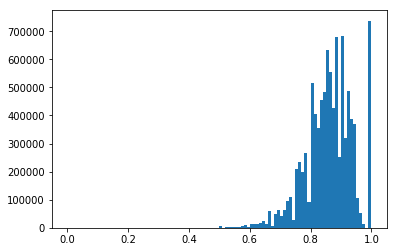

In [61]:
plt.hist(ldf['score'].values, bins=np.linspace(0,1,101))

(array([3.00000e+01, 2.79000e+02, 0.00000e+00, 1.70000e+01, 1.04000e+02,
        4.10000e+01, 7.00000e+00, 0.00000e+00, 5.24000e+02, 1.00000e+00,
        2.80000e+01, 1.00000e+02, 2.97000e+02, 5.50000e+01, 0.00000e+00,
        4.08000e+02, 2.00000e+01, 1.97000e+02, 7.52000e+02, 7.00000e+00,
        6.10000e+01, 8.34000e+02, 5.30000e+02, 4.13000e+02, 2.32000e+02,
        2.34000e+02, 1.19000e+02, 2.00000e+01, 2.00000e+00, 0.00000e+00,
        6.19500e+03, 0.00000e+00, 1.00000e+00, 3.10000e+01, 2.50000e+02,
        7.99000e+02, 9.06000e+02, 1.74700e+03, 2.56500e+03, 2.94100e+03,
        7.31000e+02, 3.11600e+03, 3.06800e+03, 1.02000e+02, 5.96800e+03,
        1.91900e+03, 8.13300e+03, 1.66500e+03, 1.28360e+04, 9.10000e+01,
        6.10200e+03, 7.37800e+03, 1.47990e+04, 7.96000e+02, 1.53220e+04,
        1.30410e+04, 1.66680e+04, 6.24600e+03, 5.44000e+02, 6.10700e+04,
        1.48700e+03, 1.82300e+04, 3.66720e+04, 3.16730e+04, 3.83710e+04,
        3.85350e+04, 6.25660e+04, 4.58380e+04, 1.04

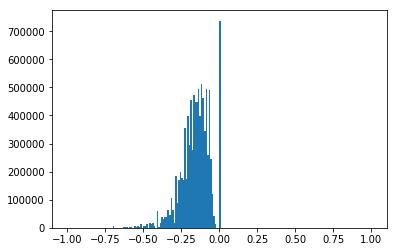

In [66]:
plt.hist(np.log(ldf['score'].values), np.linspace(-1, 1, 201))